<a href="https://colab.research.google.com/github/tylerwe19/Challenge_20_NeuralNetworks/blob/main/AlphabetSoupCharity_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf


In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
#import tensorflow as tf

from google.colab import files
uploaded = files.upload()

Saving charity_data.csv to charity_data.csv


In [3]:
import io
application_df = pd.read_csv(io.BytesIO(uploaded['charity_data.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
import pandas as pd
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN","NAME"], inplace = True)
application_df.head(10)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [6]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [ ]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<Axes: ylabel='Density'>

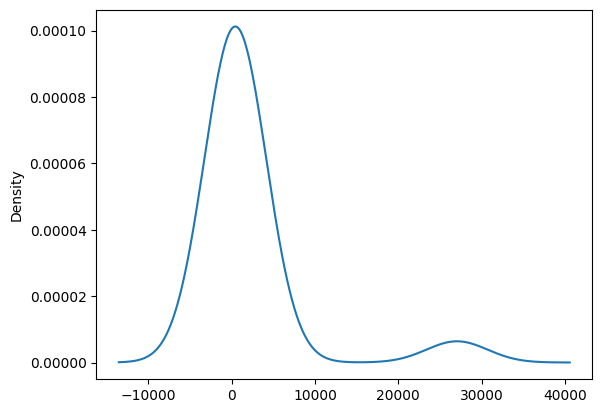

In [8]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

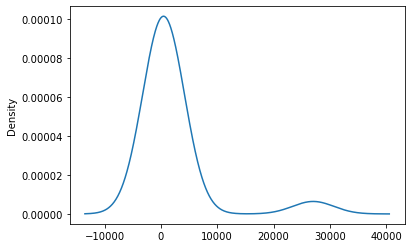

In [ ]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE

In [9]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4200        1
C4500        1
C2600        1
C2570        1
C2170        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<Axes: ylabel='Density'>

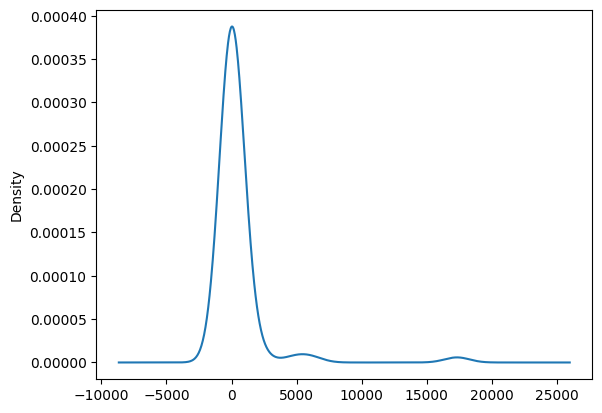

In [11]:
#Visualize value counts of CLASSIFICATION
classification_counts.plot.density()

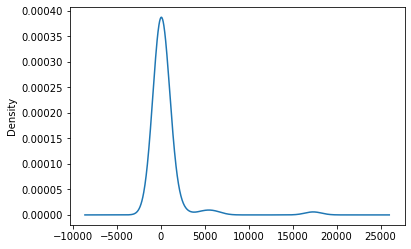

In [ ]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE

In [12]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
application_df.head(10)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [14]:
# Generate our categorical variable lists
application_cat_test = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat_test

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [15]:
# Generate our categorical variable lists
application_cat = application_df[["APPLICATION_TYPE","AFFILIATION","CLASSIFICATION","USE_CASE","ORGANIZATION","INCOME_AMT","SPECIAL_CONSIDERATIONS"]]
application_cat.head(10)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,T10,Independent,C1000,ProductDev,Association,0,N
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N
5,T3,Independent,C1200,Preservation,Trust,0,N
6,T3,Independent,C1000,Preservation,Trust,100000-499999,N
7,T3,Independent,C2000,Preservation,Trust,10M-50M,N
8,T7,Independent,C1000,ProductDev,Trust,1-9999,N
9,T5,CompanySponsored,C3000,ProductDev,Association,0,N


In [16]:
#Check number of unique vars in application_cat
application_cat.nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [17]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_cat))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(['APPLICATION_TYPE','AFFILIATION','CLASSIFICATION','USE_CASE','ORGANIZATION','INCOME_AMT','SPECIAL_CONSIDERATIONS'])
encode_df.head()

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Merge one-hot encoded features and drop the originals
new_df = application_df.merge(encode_df,left_index=True,right_index=True)
new_df.head(10)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
new_df.drop(columns=["APPLICATION_TYPE","AFFILIATION","CLASSIFICATION","USE_CASE","ORGANIZATION","INCOME_AMT","SPECIAL_CONSIDERATIONS"], inplace = True)
new_df.head(5)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
new_df.head(5)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
column_headers = list(new_df.columns.values)
print(column_headers)

['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent', 'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev', 'ORGANIZATION_Association', 'ORGANIZATION_Co-operative', 'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0', 'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999', 'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M', 'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M', 'SPECIAL_CONSIDERATIONS_N', 

In [ ]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
# Split our preprocessed data into our features and target arrays
y = new_df["IS_SUCCESSFUL"].values
X = new_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

<ipython-input-22-f1da7c297eb7>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = new_df.drop(["IS_SUCCESSFUL"],1).values


In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [ ]:
#Find Best Model

In [54]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid',])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=len(X_train[0])))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [29]:
from tensorflow import keras
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 KB 7.4 MB/s eta 0:00:00


In [55]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.RandomSearch(
    create_model,
    objective="val_accuracy",
    max_trials=20)

In [56]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

In [57]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 9,
 'num_layers': 6,
 'units_0': 7,
 'units_1': 7,
 'units_2': 7,
 'units_3': 3,
 'units_4': 5,
 'units_5': 1,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [45]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5556 - accuracy: 0.7277 - 662ms/epoch - 2ms/step
Loss: 0.555575966835022, Accuracy: 0.7276967763900757


Implement best_model

In [46]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer0 =  23
hidden_nodes_layer1 = 12
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 5
hidden_nodes_layer4 = 3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer0, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation="tanh"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,activation="sigmoid"))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4,activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 23)                1012      
                                                                 
 dense_9 (Dense)             (None, 12)                288       
                                                                 
 dense_10 (Dense)            (None, 7)                 91        
                                                                 
 dense_11 (Dense)            (None, 5)                 40        
                                                                 
 dense_12 (Dense)            (None, 3)                 18        
                                                                 
 dense_13 (Dense)            (None, 1)                 4         
                                                                 
Total params: 1,453
Trainable params: 1,453
Non-traina

In [47]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [48]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size = 40

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5*batch_size)

In [49]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
193/804 [======>.......................] - ETA: 1s - loss: 0.6230 - accuracy: 0.6737
Epoch 1: saving model to checkpoints/weights.01.hdf5
386/804 [=============>................] - ETA: 0s - loss: 0.6019 - accuracy: 0.6970
Epoch 1: saving model to checkpoints/weights.01.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.5893 - accuracy: 0.7077
Epoch 1: saving model to checkpoints/weights.01.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5858 - accuracy: 0.7099
Epoch 1: saving model to checkpoints/weights.01.hdf5
804/804 [==============================] - 4s 2ms/step - loss: 0.5849 - accuracy: 0.7110
Epoch 2/100
184/804 [=====>........................] - ETA: 1s - loss: 0.5574 - accuracy: 0.7315
Epoch 2: saving model to checkpoints/weights.02.hdf5
378/804 [=============>................] - ETA: 0s - loss: 0.5604 - accuracy: 0.7291
Epoch 2: saving model to checkpoints/weights.02.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 

In [50]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5542 - accuracy: 0.7251 - 582ms/epoch - 2ms/step
Loss: 0.554231584072113, Accuracy: 0.7251312136650085


In [ ]:
#Export the model to HD5 File
nn.save("AlphabetSoupCharity.h5")

Second Attempt

In [53]:
X_train[0]

array([1.e+00, 5.e+03, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       1.e+00, 0.e+00, 0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+00,
       1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 1.e+00, 0.e+00])

In [58]:
# Define the model - deep neural net
number_input_features = 43
hidden_nodes_layer0 =  7
hidden_nodes_layer1 = 7
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 3
hidden_nodes_layer4 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer0, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation="tanh"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,activation="sigmoid"))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4,activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 7)                 308       
                                                                 
 dense_15 (Dense)            (None, 7)                 56        
                                                                 
 dense_16 (Dense)            (None, 7)                 56        
                                                                 
 dense_17 (Dense)            (None, 3)                 24        
                                                                 
 dense_18 (Dense)            (None, 5)                 20        
                                                                 
 dense_19 (Dense)            (None, 1)                 6         
                                                                 
Total params: 470
Trainable params: 470
Non-trainable 

In [59]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [60]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size = 40

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5*batch_size)

In [61]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
198/804 [======>.......................] - ETA: 1s - loss: 0.7012 - accuracy: 0.5712
Epoch 1: saving model to checkpoints/weights.01.hdf5
397/804 [=============>................] - ETA: 0s - loss: 0.6572 - accuracy: 0.6337
Epoch 1: saving model to checkpoints/weights.01.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.6310 - accuracy: 0.6631
Epoch 1: saving model to checkpoints/weights.01.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6169 - accuracy: 0.6782
Epoch 1: saving model to checkpoints/weights.01.hdf5
804/804 [==============================] - 3s 2ms/step - loss: 0.6156 - accuracy: 0.6793
Epoch 2/100
194/804 [======>.......................] - ETA: 1s - loss: 0.5646 - accuracy: 0.7291
Epoch 2: saving model to checkpoints/weights.02.hdf5
381/804 [=============>................] - ETA: 0s - loss: 0.5665 - accuracy: 0.7249
Epoch 2: saving model to checkpoints/weights.02.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 

In [62]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5547 - accuracy: 0.7250 - 747ms/epoch - 3ms/step
Loss: 0.5547069311141968, Accuracy: 0.7250145673751831


In [66]:
app_cols = [col for col in new_df.columns if 'APPLICATION' in col]
print(app_cols)

['APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8']


In [67]:
class_cols = [col for col in new_df.columns if 'CLASSIFICATION' in col]
print(class_cols)

['CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_Other']


In [68]:
income_cols = [col for col in new_df.columns if 'INCOME' in col]
print(income_cols)

['INCOME_AMT_0', 'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999', 'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M', 'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M']


In [73]:
app_df = new_df[app_cols]
app_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [74]:
income_df = new_df[income_cols]
income_df.head()

,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [75]:
app_inc_df = app_df.merge(income_df,left_index=True,right_index=True)
app_inc_df.head(10)

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
class_df = new_df[class_cols]
class_df.head()

,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In [77]:
app_class_inc_df = app_inc_df.merge(class_df,left_index=True,right_index=True)
app_class_inc_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,INCOME_AMT_0,...,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [78]:
test_df = app_class_inc_df.merge(new_df['SPECIAL_CONSIDERATIONS_Y'],left_index=True,right_index=True)
test_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,INCOME_AMT_0,...,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
test_df_column_headers = list(test_df.columns.values)
print(test_df_column_headers)

['APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8', 'INCOME_AMT_0', 'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999', 'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M', 'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_Other', 'SPECIAL_CONSIDERATIONS_Y']


In [80]:
X2 = test_df.values
y2 = new_df["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=78)

In [81]:
# Define the model - deep neural net
number_input_features = len(X2_train[0])
hidden_nodes_layer0 =  7
hidden_nodes_layer1 = 7
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 3
hidden_nodes_layer4 = 5

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer0, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="sigmoid"))

# Third hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation="tanh"))

# Fourth hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,activation="sigmoid"))

# Fifth hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer4,activation="tanh"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 7)                 182       
                                                                 
 dense_21 (Dense)            (None, 7)                 56        
                                                                 
 dense_22 (Dense)            (None, 7)                 56        
                                                                 
 dense_23 (Dense)            (None, 3)                 24        
                                                                 
 dense_24 (Dense)            (None, 5)                 20        
                                                                 
 dense_25 (Dense)            (None, 1)                 6         
                                                                 
Total params: 344
Trainable params: 344
Non-trainable 

In [83]:
# Compile the Sequential model together and customize metrics
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [84]:
# Fit the model to the training data
fit_model = nn2.fit(X2_train, y2_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.6865 - accuracy: 0.5722
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.6471 - accuracy: 0.6179
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6433 - accuracy: 0.6195
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6434 - accuracy: 0.6169
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6426 - accuracy: 0.6190
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6424 - accuracy: 0.6189
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6417 - accuracy: 0.6171
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6424 - accuracy: 0.6157
Epoch 9/100
804/804 [==============================] - 2s 3ms/step - loss: 0.6417 - accuracy: 0.6176
Epoch 10/100
804/804 [==============================] - 2s 3ms/step - loss: 0.6413 - accura

In [85]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X2_test,y2_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6318 - accuracy: 0.6316 - 527ms/epoch - 2ms/step
Loss: 0.6318269371986389, Accuracy: 0.631603479385376


In [86]:
# Define the model - deep neural net
number_input_features = len(X2_train[0])
hidden_nodes_layer0 =  7
hidden_nodes_layer1 = 7
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 3
hidden_nodes_layer4 = 5


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer0, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation="tanh"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,activation="tanh"))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4,activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 7)                 182       
                                                                 
 dense_27 (Dense)            (None, 7)                 56        
                                                                 
 dense_28 (Dense)            (None, 7)                 56        
                                                                 
 dense_29 (Dense)            (None, 3)                 24        
                                                                 
 dense_30 (Dense)            (None, 5)                 20        
                                                                 
 dense_31 (Dense)            (None, 1)                 6         
                                                                 
Total params: 344
Trainable params: 344
Non-trainable 

In [87]:
# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [88]:
# Fit the model to the training data
fit_model = nn.fit(X2_train, y2_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 4s 2ms/step - loss: 0.8339 - accuracy: 0.5379
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6601 - accuracy: 0.6084
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6486 - accuracy: 0.6178
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6445 - accuracy: 0.6197
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.6441 - accuracy: 0.6180
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6431 - accuracy: 0.6192
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6426 - accuracy: 0.6192
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6421 - accuracy: 0.6201
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6419 - accuracy: 0.6183
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6415 - accura

In [89]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X2_test,y2_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6308 - accuracy: 0.6346 - 572ms/epoch - 2ms/step
Loss: 0.6307709217071533, Accuracy: 0.6346355676651001
